# Curso Análisis de Redes

## Cátedra Teoría de las Telecomunicaciones - Universidad ORT Uruguay



# Cadenas de Markov de Tiempo discreto


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a8/Andrei_Markov.jpg/330px-Andrei_Markov.jpg" style="height: 400px;float:right;padding-left:2em"/>

## Definición:

Consideremos un proceso estocástico $\{X_n\}$ de tiempo discreto, es decir, una sucesión de variables aleatorias con $n = 0, 1, 2, \ldots$, que toma valores en un *espacio de estados*:

$$ E= \{i,j,\ldots\}$$

discreto (finito o numerable).


> **Definición:** El proceso $\{X_n\}$ es una *Cadena de Markov de Tiempo Discreto (CMTD)* si se
verifica la *propiedad de Markov*:
>
$$P(X_{n+1} = j \mid X_n = i, X_0 , \ldots , X_{n−1} ) = P(X_{n+1} = j \mid X_n = i) = p_{ij}.$$

A las probabilidades $p_{ij}$ se les denomina *probabilidades de transición* y a la matriz $P=(p_{ij})$ *matriz de
transición* de la cadena.

### Idea:

* Una vez que el proceso llega al estado $X_n = i$, se olvida del pasado, y lo que ocurra en el tiempo $n+1$ (y
subsiguientes) está completamente determinado por las probabilidades $p_{ij}$ de la matriz.


* En particular, el estado $X_{n+1}$, una vez que sabemos que $X_n = i$, se sortea usando la fila $i$ de la matriz P:
$$p_i = (p_{i1} , p_{i2} , \ldots)$$
de manera independiente del pasado.


* En cada momento de tiempo se sortea un nuevo "salto".


* **Observación:** Las variables $X_n$ *no son independientes*, cada una depende de la anterior, formando la cadena.

## Propiedades de la matriz de transición

**Propiedad 1:** La matriz $P$ tiene entradas $p_{ij} \geqslant 0$.

Esto es simplemente porque se trata de probabilidades.


**Propiedad 2:** La matriz $P$ suma 1 por filas, es decir:
$$\sum_{j\in E} p_{ij} = 1 \quad \forall i \in E.$$

En forma matricial, si $\mathbf{1}$ es un vector de unos, se tiene que:

$$P\mathbf{1} = \mathbf{1}.$$

Esta propiedad es consecuencia de que:

$$\sum_{j\in E} p_{ij} = \sum_{j\in E} P(X_{n+1} = j \mid X_n = i) = P(X_{n+1} \in E \mid X_n=i) = 1$$
ya que la cadena debe estar en algún estado en tiempo $n+1$.

**Nota:** A las matrices que cumplen las dos propiedades anteriores se les denomina matrices estocásticas.

## Grafo de transiciones

Muchas veces, es más útil representar la cadena mediante el *grafo de transiciones*. Aquí, cada estado se
representa como un nodo del grafo, y cada posible transición entre el estado i y el estado j (es decir, $p_{ij} > 0$) se representan como un arco dirigido de $i$ a $j$ de peso $p_{ij}$.


**Observación:** en cualquier estado puede ocurrir que $p_{ii} > 0$ , es decir, hay probabilidad positiva de
quedarse en dicho estado en el próximo paso. En ese caso se dibuja un arco que vuelve a $i$.

### Ejemplo

Un modelo de clima, con dos estados:

![Ejemplo](images/simple_markov_chain.png)


En este caso $E=\{1,2\} \equiv \{sunny,rainy\}$:

$$ P = \begin{pmatrix} 0.9 & 0.1 \\ 0.5 & 0.5\end{pmatrix}$$

## Ecuaciones de Chapman-Kolmogorov

La matriz $P$ define las transiciones a un paso. Queremos ver qué ocurre si consideramos más pasos de
tiempo hacia el futuro, esto es, calcular $P(X_{n+m} = j \mid X_n = i)$ con $m\geqslant 1$. Definamos:

$$p^{(m)}_{ij} = P( X_{n+m} = j \mid X_n = i),$$

la probabilidad de transición en $m$ pasos. Observemos que $p_{ij}^{(1)} = p_{ij}$.

Se tiene la siguiente recurrencia:

$$\begin{align}
p_{ij}^{(m+1)}  &= P(X_{n+m+1} = j \mid X_n = i) \\
                &= \sum_{k\in E}  P(X_{n+m+1} = j, X_{n+m}=k \mid X_n = i) \\
                &= \sum_{k\in E}  P(X_{n+m+1} = j\mid X_{n+m}=k, X_n = i) P(X_{n+m} = k \mid X_n = i)\\
                &= \sum_{k\in E}  P(X_{n+m+1} = j\mid X_{n+m}=k) P(X_{n+m} = k \mid X_n = i)\\
                &= \sum_{k\in E}  p_{ik}^{(m)}p_{kj}
\end{align}$$

### Expresión matricial

La cuenta anterior corresponde a la entrada $ij$ de un producto de matrices. Si $P^{(m)}$ es la matriz de transición en $m$ pasos se tiene entonces que:

$$ P^{(m+1)} = P P^{(m)},$$

de donde $P^{(m+1)} = P^m$, es decir, la matriz de transición en $m$ pasos es simplemente la potencia $m$ de la
matriz de transición original.


Esto también puede escribirse como:

$$P^{(m+n)} = P^m P^n = P^n P^m = P^{n+m}$$

que de denominan ecuaciones de *Chapman-Kolmogorov*.

## Evolución del estado

Nos interesa ahora conocer la evolución del estado en el tiempo, a partir de una condición inicial que puede
ser aleatoria.

Consideremos que sabemos la probabilidad con que la cadena puede comenzar en cada uno de los estados
(esta probabilidad puede ser 1 en un estado si la condición inicial es determinística).

Sea $\pi^{(0)}$ el vector fila con la condición inicial, que suponemos conocida:

$$\pi^{(0)} = (P(X_0 = i), P( X_0 = j), P( X_0 = k), \ldots).$$


Definamos ahora análogamente $\pi^{(n)}$ como:

$$\pi^{(n)} = (P(X_n = i), P( X_n = j), P( X_n = k), \ldots),$$
la distribución en tiempo n . 

Observemos que $\sum_{i\in E} \pi_i^{(n)} = 1$ para todo $n$, o bien $\pi^{(n)}\mathbf{1} = 1$.

Razonando como antes se tiene la siguiente recurrencia:


$$\begin{align}
\pi_{j}^{(n+1)} &= P(X_{n+1} = j) \\
                &= \sum_{i\in E}  P(X_{n+1} = j, X_{n}=i) \\
                &= \sum_{i\in E}  P(X_{n+1} = j\mid X_n = i) P(X_{n} = i)\\
                &= \sum_{i\in E}  \pi_i^{(n)} p_{ij}
\end{align}$$

Matricialmente, corresponde nuevamente a un producto, en este caso de vector fila por matriz. Es decir:

$$\pi^{(n+1)} = \pi^{(n)} P.$$

Levantando la recurrencia obtenemos:
$$\pi^{(n)} = \pi^{(n-1)} P = \pi^{(n-2)}P^2 = \ldots = \pi^{(0)} P^n.$$


Otra forma de ver lo anterior es que la probabilidad de estar en cada estado se propaga, luego de $n$ pasos,
por la matriz de transición en $n$ saltos descrita más arriba.

## Estado estacionario de una CMTD

Muchas veces, nos interesa estudiar qué ocurre con una cadena en *estado estacionario*, es decir, luego de
pasado un tiempo, estudiar que ocurre con la probabilidad de encontarla en cada estado particular.

Matemáticamente, queremos calcular:

$$\pi = \lim_{n\to\infty} \pi^{(n)}$$

Algunas preguntas que surgen inmediatamente son las siguientes:

* ¿Existe el límite anterior?
* ¿Es el mismo independientemente de la condición inicial elegida?
* ¿Todos los estados tienen probabilidad positiva en el límite?

Veremos que no siempre es posible responder afirmativamente estas preguntas, pero por ahora
supongamos que nuestra cadena verifica estas propiedades y que existe entonces una distribución
estacionaria $\pi$. ¿Cuál debería ser entonces este límite?

### Ecuaciones de balance global

La respuesta se halla precisamente tomando límite en la recurrencia anterior:

$$\pi^{(n+1)} = \pi^{(n)} P,$$

de donde si existe $\pi = \lim_n \pi^{(n)} = \lim_n \pi^{(n+1)}$ debe cumplir:

$$\pi = \pi P.$$

* Lo anterior es un sistema lineal de ecuaciones que podemos resolver. Sin embargo como las filas de $P$
suman $1$, dichas ecuaciones *no son linealmente independientes*. 

* De hecho, el sistema siempre tiene (al menos) un grado de libertad. Afortunadamente, tenemos otra ecuación que se debe cumplir, y es que las probabilidades $\pi$ **deben sumar $1$**. 

* Por lo tanto, el límite debe cumplir las:
> **Ecuaciones de balance global:**
>
> $$\pi: \left\{\begin{array}{cc}\pi = \pi P \\ \pi \mathbf{1} = 1\end{array}\right.$$


### Ejemplo

Resolvamos el ejemplo anterior, donde la matriz $P$ es:

$$ P = \begin{pmatrix} 0.9 & 0.1 \\ 0.5 & 0.5\end{pmatrix}$$

Sea $\pi = (\pi_S,\pi_R)$ la probabilidad de soleado y lluvioso respectivamente. 

Las ecuaciones de balance son:

$$\begin{align}
\pi_S &= \pi_S 0.9 + \pi_R 0.5 \\
\pi_R &= \pi_S 0.1 + \pi_R 0.5 \\
\pi_S &+ \pi_R = 1
\end{align}$$

Observemos que las dos primeras ecuaciones son equivalentes a $0.1 \pi_S = 0.5\pi_R$ es decir, $\pi_S$ es 5 veces más probable que $\pi_R$. Como deben sumar $1$ entonces obtenemos que:

$$\pi_S = 5/6, \quad \pi_R = 1/6,$$

que es la distribución estacionaria de esta cadena.

## Simulación en Julia

¿Cómo simulamos entonces una Cadena de Markov? ¿Cómo analizamos el estado estacionario? Para comenzar usemos las ideas de variables discretas que ya vimos, y simulemos el ejemplo anterior de dos estados, pero con una matriz $P$ genérica.

A continuación damos un código que simula una cadena de Markov. Recibe la matriz $P$ y el vector $\pi^{(0)}$ que indica cómo sortear el estado inicial, y la cantidad de pasos a simular.

In [1]:
#using Pkg; Pkg.instantiate(); Pkg.update()

In [2]:
using Distributions

function simulaMarkov(P,pi, Tfinal)
    
    #defino el no. de estados como el no. de filas de P
    N = size(P,1)
    
    #inicializo un vector para guardar los estados
    X=zeros(Tfinal)
    
    #Sorteo el estado inicial usando "Categorical" que es una distribucion con soporte en $1...N$
    dist_pi = Categorical(vec(pi))
    estado = rand(dist_pi)
    X[1] = estado
    
    for n=2:Tfinal
        
        #defino la distribución de salto
        dist_salto = Categorical(vec(P[estado,:]))
        estado = rand(dist_salto)
        X[n] = estado
    end
    
    return X
end

        

simulaMarkov (generic function with 1 method)

In [3]:
P=[0.9 0.1;0.5 0.5]
pi=[1.0 0.0]

Tfinal=10000

X=simulaMarkov(P,pi,Tfinal)

10000-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 2.0
 1.0
 2.0
 2.0
 1.0
 1.0
 1.0
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

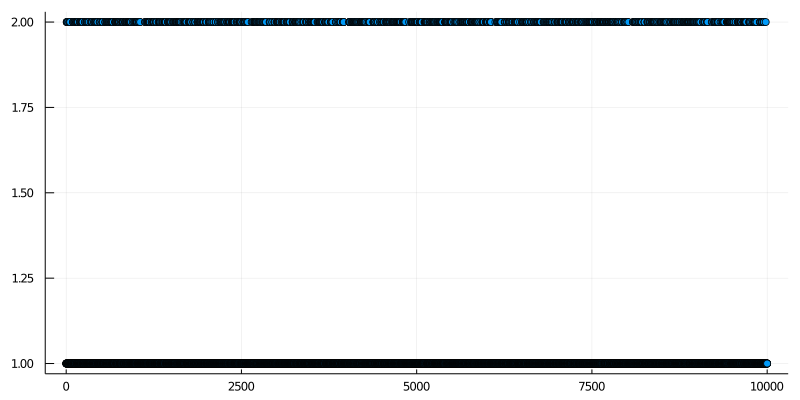

In [4]:
using Plots
#Parametros por defecto de las graficas
default(size=(800,400))

scatter(X, label=:none)

Analicemos cuánto tiempo pasa la cadena en cada estado:

In [5]:
N=size(P,1)
pi_sim = zeros(N)

for i=1:N
    
    pi_sim[i] = sum(X.==i)/length(X)
    
end
pi_sim

2-element Array{Float64,1}:
 0.8327
 0.1673

Recordemos que la distribución teórica es:

In [6]:
pi = [5/6 1/6]

1×2 Array{Float64,2}:
 0.833333  0.166667

Contemos ahora por ejemplo las transiciones observadas entre estados:

In [7]:
N=size(P,1)
P_sim = zeros(N,N)

for i=1:N
    for j=1:N
        P_sim[i,j] = sum((X[1:end-1].==i).*(X[2:end].==j))/sum(X[1:end-1].==i)
    end
end

P_sim

2×2 Array{Float64,2}:
 0.898751  0.101249
 0.503885  0.496115

Comparar con la matrix $P$ que define la cadena.

## Ergodicidad de proceso

La noción de *ergodicidad* de una cadena de Markov la veremos en detalle más adelante, pero básicamente indica que el proceso:

* Llega a un estado de régimen caracterizado por la distribución invariante.
* Dicho régimen no depende de la condición inicial utilizada (es independiente de $\pi^{(0)}$.

Probemos en el ejemplo anterior entonces:

* Aumentar `Tfinal` para ver qué ocurre con las estimaciones.
* Cambiar `pi` para ver si es independiente o no de cómo comienza.

Básicamente, si el proceso se "baraja bien", se llega a un régimen caracterizado por $\pi$ solución de las ecuaciones de balance. 

### Ejemplo

Analicemos por qué la cadena se olvida de la condición inicial en el ejemplo anterior. Observemos qué ocurre con las potencias de $P$, es decir, la matriz de transición a varios pasos:

In [8]:
display(P)
display(P^2)
display(P^3)
display(P^4)

2×2 Array{Float64,2}:
 0.9  0.1
 0.5  0.5

2×2 Array{Float64,2}:
 0.86  0.14
 0.7   0.3

2×2 Array{Float64,2}:
 0.844  0.156
 0.78   0.22

2×2 Array{Float64,2}:
 0.8376  0.1624
 0.812   0.188

In [9]:
display(P^100)

2×2 Array{Float64,2}:
 0.833333  0.166667
 0.833333  0.166667

**Observación:** las filas de $P$ convergen a la distribución invariante. Esto quiere decir que no importa cuál sea la distribución inicial, si hacemos:

$$\pi^{(n)} = \pi^{(0)} P^n$$

siempre nos da el mismo resultado.

Más adelante veremos en qué hipótesis hay que pedir para que la cadena cumpla esto.

## Aplicación: el algoritmo Page-Rank (Page & Brin, 1998)

**Idea:** Asignar un ranking de importancia a las páginas web, para mejorar las búsquedas.

* La idea básica es representar las páginas web como nodos en un grafo, donde los enlaces entre páginas son las aristas (dirigidas) del grafo. 

* Es decir, si hay un link de la página $i$ a la página $j$, colocamos una arista $i\to j$. Así con todos los nodos que queramos considerar.

* Para rankear, se considera el siguiente experimento: supongamos que un usuario navega al azar por las páginas, comenzando en una cualquiera, y siguiendo los links. Una vez que se encuentra en la página $i$, la próxima página que visita es una al azar de todas las que tienen una arista saliente de $i$.

### Paseo al azar en un grafo

Observemos que el proceso $X_n =$"página que visita en el tiempo $n$" es una CMTD. Dado que quien navega se encuentra en una página, la próxima elección es independiente del pasado, y solo intervienen los links de la página actual.

Este proceso se conoce como *paseo al azar en un grafo*.

Si dejamos a este proceso correr mucho tiempo, eventualmente pasará más tiempo visitando las páginas
más "importantes". Tiene sentido entonces asignar rankings de acuerdo a la distribución invariante $\pi$ de
la cadena. A continuación presentamos un ejemplo usando Julia.

┌ Info: Precompiling GraphPlot [a2cc645c-3eea-5389-862e-a155d0052231]
└ @ Base loading.jl:1278


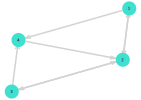

In [10]:
#Ejemplo de grafo simple
using LightGraphs, GraphPlot
G=DiGraph(4);
add_edge!(G,(1,2))
add_edge!(G,(1,4))
add_edge!(G,(2,1))
add_edge!(G,(2,3))
add_edge!(G,(3,2))
add_edge!(G,(3,4))
add_edge!(G,(4,2))
gplot(G,nodelabel=1:4)

In [11]:
#Matriz de adyacencia del grafo. Indica cómo se conectan.
A=Matrix(adjacency_matrix(G))

4×4 Array{Int64,2}:
 0  1  0  1
 1  0  1  0
 0  1  0  1
 0  1  0  0

Para deducir la matriz de la cadena a partir de los links, simplemente hay que normalizar por los links salientes.

In [12]:
#normalizo para hallar la matriz de transición
#Construyo P a partir de A
P=zeros(size(A));
for i=1:4
P[i,:] = A[i,:]/sum(A[i,:]);
end
P

4×4 Array{Float64,2}:
 0.0  0.5  0.0  0.5
 0.5  0.0  0.5  0.0
 0.0  0.5  0.0  0.5
 0.0  1.0  0.0  0.0

Resolvemos ahora las ecuaciones de balance:

$$\pi: \left\{\begin{array}{cc}\pi = \pi P \Leftrightarrow \pi(P-Id)=0\\ \pi \mathbf{1} = 1\end{array}\right.$$

Notar que estas ecuaciones son equivalentes a:

$$\pi: \pi [P-Id \; \mathbf{1}] = [0 \ldots 0,1].$$


In [13]:
#Resolvemos ahora las ecuaciones de balance. Para ello, observamos que la matriz del sistema es P-Id
#con una columna de unos agregada al final.
#El termino independiente es ceros salvo el último.
using LinearAlgebra

A=[P-I(4) ones(4,1)];
b=[zeros(1,4) 1.0];
pi=b/A
pi=pi[:]

4-element Array{Float64,1}:
 0.19999999999999984
 0.3999999999999999
 0.20000000000000012
 0.20000000000000004

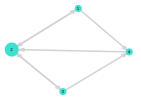

In [14]:
#Graficamos ahora el grafo con el tamaño del nodo proporcional a su ranking.
gplot(G,nodelabel=1:4,nodesize=100*pi)

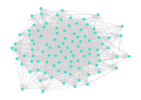

In [15]:
#Ejemplo con grafo aleatorio.

n=100; #no. de nodos
p=0.1; #probabilidad de arista

#Generamos una matriz de nxn donde hay una arista de i->j con probabilidad p.
#
bernoulli = Bernoulli(p)

A=rand(bernoulli,n,n);

#inicializo P
P=zeros(size(A))
#Construyo P a partir de A
for i=1:n
    P[i,:] = A[i,:]/sum(A[i,:]);
end

#Finalmente construimos el grafo y lo mostramos.
G=DiGraph(A)
gplot(G)

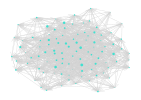

In [16]:
#Resolvemos ahora las ecuaciones de balance. 
A=[P-I(n) ones(n,1)];
b=[zeros(1,n) 1.0];
pi=b/A
pi=pi[:];

#Graficamos ahora el grafo con el tamaño del nodo proporcional a su ranking.
gplot(G,nodesize=100*pi)

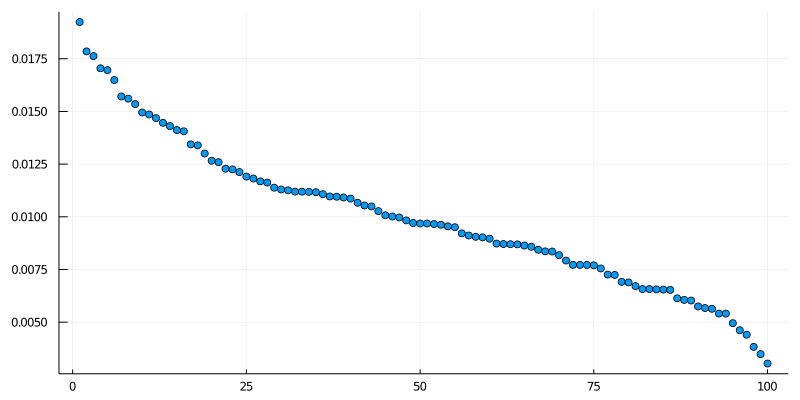

In [17]:
scatter(sort(pi,rev=true),label=:none)